# BPL_TEST2_Perfusion - demo

This notebook explore perfusion cultivation in comparison with ordinary continuous cultivation (chemostat) and use comparable settings to earlier notebook. Further you see here examples of interaction with the simplified commands par(), init(), simu() etc as well as direct interaction with the FMU which is called "model" here. The last simulation is always available in the workspace and called "sim_res". Note that describe() brings mainly up from descriptive information from the Modelica code from the FMU but is complemented by some information given in the Python setup file.

In [1]:
run -i BPL_TEST2_Perfusion_fmpy_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

No processDiagram.png file in the FMU, but try the file on disk.


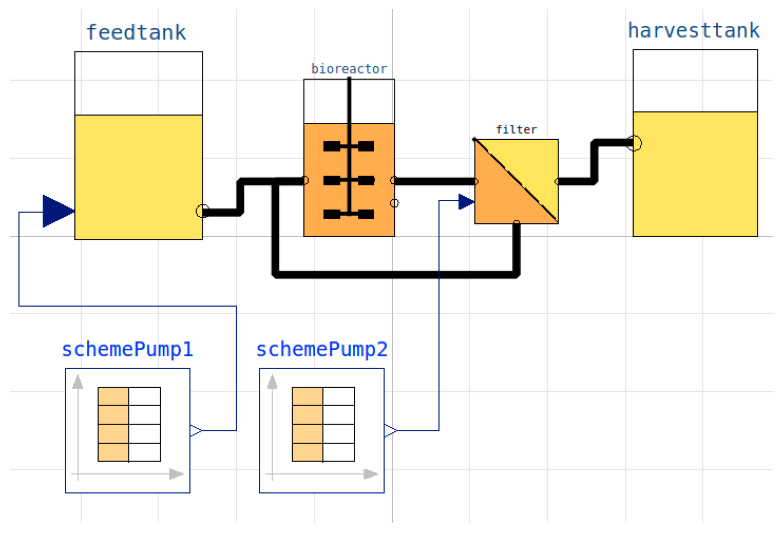

In [3]:
process_diagram()

In [4]:
# Process parameters used throughout
par(Y=0.5, qSmax=0.75, Ks=0.1)                                      # Culture
par(filter_eps=0.10, filter_alpha_X=0.02, filter_alpha_S=0.10)      # Filter
par(S_in=30.0)                                                      # Inlet substrate conc 
init(V_start=1.0, VX_start=1.0)                                     # Process initial conditions that are common
eps = parDict['filter_eps']                                         # Pump schedule parameter 


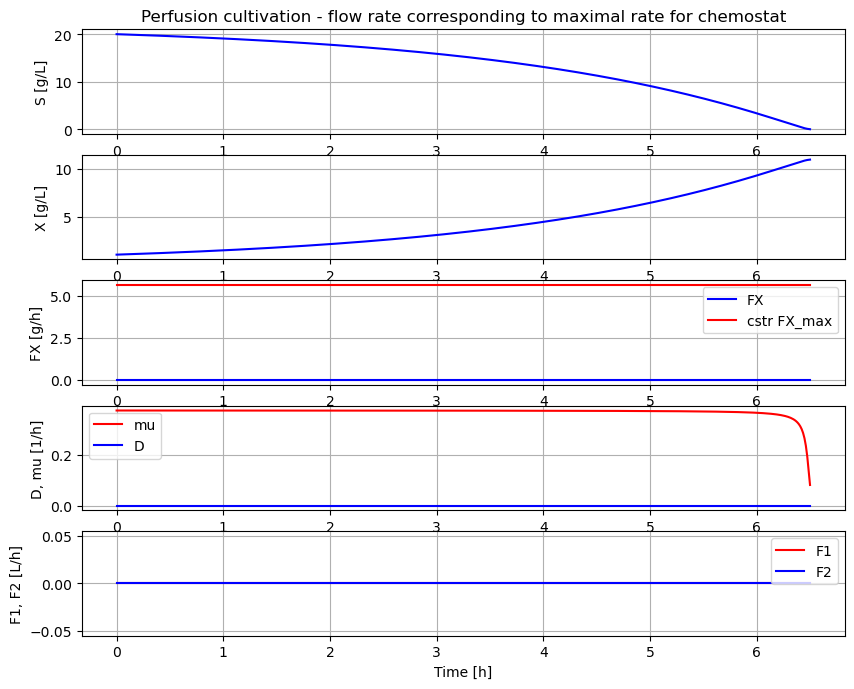

In [5]:
# Simulation of process with flow rate clot to wash-out for chemostat

init(VS_start=20)                                        # Process initial                   
par(pump1_t1=10, pump2_t1=10)                            # Pump schedule - recycle flow 10 times perfusion flow
par(pump1_F1=2.5*0.155, pump2_F1=2.5*0.155/eps)  
par(pump1_t2=940, pump2_t2=940, pump1_t3=950, pump2_t3=950, pump1_t4=960, pump2_t4=960)

newplot(title='Perfusion cultivation - flow rate corresponding to maximal rate for chemostat')
simu(6.5)

In [6]:
# Concentration factor of the filter
c=model_get('filter.retentate.c[1]')/model_get('filter.inlet.c[1]')
print('Conc factor of perfusion filter =', np.round(c,3))

Conc factor of perfusion filter = 1.186


In [7]:
c_data=sim_res['filter.retentate.c[1]']/sim_res['filter.inlet.c[1]']
print('Conc factor variation', np.round(min(c_data[151:]), 3),'to', np.round(max(c_data[151:]),3))

Conc factor variation 1.186 to 1.186


FMICallException: fmi2DoStep failed with status 3 (error).

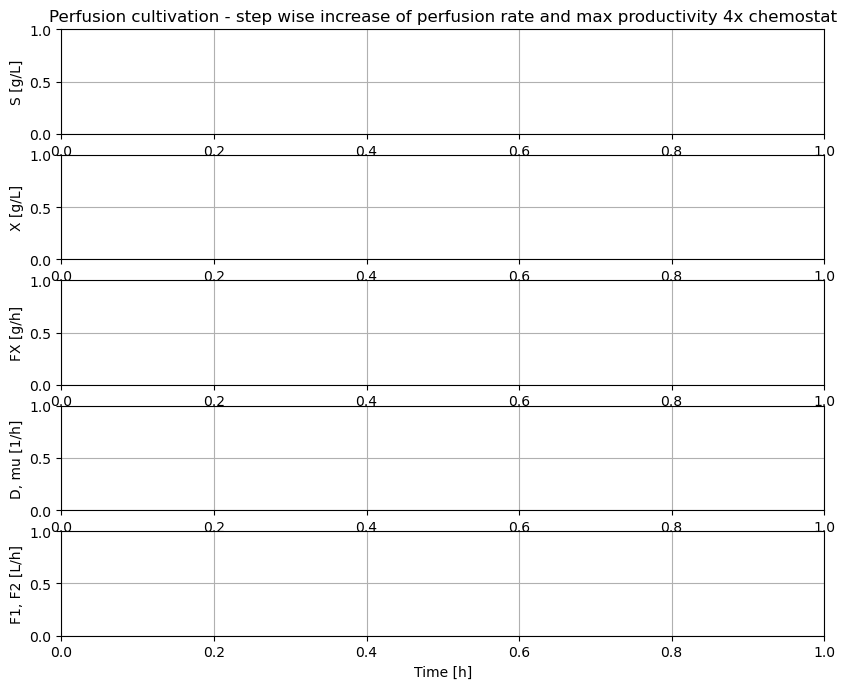

In [8]:
# Simulation of process with step-wise increase of pefusion rate until wash-out.
# This means that re-circulation rate change at the same time as the perfusion rate.

init(VS_start=150)                                       # Process initial varied                                         

par(pump1_t1=12, pump2_t1=12)                            # Pump schedule - recycle flow 10 times perfusion flow
par(pump1_F1=2.5*0.155, pump2_F1=2.5*0.155/eps)  
par(pump1_t2=22, pump2_t2=22) 
par(pump1_F2=2.5*0.35, pump2_F2=2.5*0.35/eps) 
par(pump1_t3=32, pump2_t3=32) 
par(pump1_F3=2.5*0.63, pump2_F3=2.5*0.63/eps) 
par(pump1_t4=42, pump2_t4=42) 
par(pump1_F4=2.5*0.83, pump2_F4=2.5*0.83/eps) 

newplot(title='Perfusion cultivation - step wise increase of perfusion rate and max productivity 4x chemostat')
simu(60)

In [ ]:
# Simulation without a plot and just to check typical values at high production rate
simu(40)
c_data=sim_res['filter.retentate.c[1]'][304:]/sim_res['filter.inlet.c[1]'][304:]
print('Conc factor variation', np.round(min(c_data[304:]), 3), 'to', np.round(max(c_data[304:]),3))

In [ ]:
#describe('cstrProdMax')

In [ ]:
# The maximal biomass productivity before washout is obtained aroudn 40 hours
np.round(model_get('harvesttank.inlet.F')*model_get('harvesttank.inlet.c[1]'),1)

In [ ]:
# Thus perfusion (with this filter) brings a productivity improvement of about
np.round(23.5/5.6,1)

In [ ]:
# Finally we check the filter flow rates at time 40 hour - note the negative sign for outlfow
model_get('filter.inlet.F')

In [ ]:
model_get('filter.filtrate.F')

In [ ]:
model_get('filter.retentate.F')

## Summary
* The perfusion filter had a concentration factor of cells around 1.08 and re-cycling flow was set to a factor 10 higher than the perfusion rate and changed when perfusion rate was change to keep the ratio factor 10. 
* The first simulation showed that by cell retention using perfusion filter the process could be run at a perfusion flow rate at the maximal flow rate possible for corresponding chemostat culture and cell concetration increased steadily.
* The second simulation showed that with a proper startup cell concentration, the cell concentration remained constant when perfusion rate increased in a similar way as what we see in a chemostat. 
* The second simulation also showed that biomass productivity in this case was increased by a factor 4.2 compared to chemostat.
* If the perfusion rate increased to higher levels washout started but the decrase of cell concentration was slow.

Some of you who read this may have your perfusion experience with CHO-cultures. For such cultures the cell concentration do increase with increase of perfusion rate and there are understood reasons for that. But for this simplifed process as well as microbial processes they typically keep cell concentration constant when flow rate is chaged, and that under quite wide conditions. I will try come back to this phenomena in a later notebook.

## Appendix

In [ ]:
disp('culture')

In [ ]:
describe('mu')

In [ ]:
# List of components in the process setup and also a couple of other things like liquidphase and D
describe('parts')

In [ ]:
describe('MSL')

In [9]:
system_info()


System information
 -OS: Windows
 -Python: 3.12.3
 -Scipy: not installed in the notebook
 -FMPy: 0.3.20
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: CS
 -Name: BPL_TEST2.Perfusion
 -Generated: 2024-05-12T21:00:01
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.2.0
 -Interaction: FMU-explore for FMPy version 1.0.0
